# Introduction

The `numpy` module is optimized for array operations that are frequently used in computational mathematics. This is supported by two features of `numpy` arrays: *vectorization* and *broadcasting*.

Vectorization refers to operations and functions that operate "in parallel" on all elements of an array. This does not mean that the operations are actually done in parallel, but that `numpy` is able to do the operation using C loops, which are much faster than Python loops. Vectorization can also take advantage of CPU and GPU architectures that support parallelization.

Broadcasting extends mathematical operations for arrays of different shape. It is a form of vectorization that leads to code that is expressive, easy to read and efficient.

Before running this notebook, let's import the modules and functions we will use:

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Vectorized operations and functions

Operations and functions on `numpy` arrays are *vectorized*. This means that they operate on all elements of an array "simultaneously". For example, let's compute the value of $\sin(x)$ for the elements of an array:

In [105]:
xvalues = np.linspace(0, np.pi, 5)
yvalues = np.sin(xvalues)
print(xvalues)
print(yvalues)

[0.         0.78539816 1.57079633 2.35619449 3.14159265]
[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]


The function call `np.linspace(0, np.pi, 5)` returns an array of 5 points between $0$ and $\pi$. Notice that, contrary to the usual Python convention, `linspace()` *does* include the endpoint of the interval.

Next, notice the function call `np.sin(xvalues)`. This computes the value of $\sin(x)$ for all elements of the array. Behind the scenes, `numpy` passes the function call to precompiled code written in the C language, which results in much faster execution times.

To see how much faster the code is, let's compare the time of computation for a large array. First, let's do the computation using Python lists and a loop:

In [109]:
%%timeit
n = 10000
yvalues = (n + 1) * [0.0]
for i in range(n+1):
    yvalues[i] = np.sin((i / n) * np.pi)

6.09 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Notice the `%%timeit` special instruction at the beginning of the cell. This kind of instruction is called a "cell magic". In this particular case, the cell is run a number of loops, and the average run time is recorder. Before checking the running time using `numpy` arrays, let's see if the execution time improves if we use a list comprehension instead of a `for` loop:

In [110]:
%%timeit
n = 10000
yvalues = [np.sin((i / n) * np.pi) for i in range(n+1)]

5.76 ms ± 61 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You'll probably notice that there is a slight improvement in running time. Let's now compare it with the `numpy` code:

In [111]:
%%timeit
xvalues = np.linspace(0, np.pi, 5)
yvalues = np.sin(xvalues)

23 µs ± 380 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notice that the execution is much faster now. The exact times will vary depending on the computer you are using. When we run this code in the list comprehension mode, execution takes about 5.7 milliseconds on the average. In the `numpy` version, it takes 23 *micro*seconds. So, the vectorized version is about 250 times faster! This is a bit unusual, in more typical situations the `numpy` code will be about 10 times faster than the standard Python code.

It is also possible to define our own vectorized functions. The simplest way to do this is to use `numpy` vectorized functions. In this case, we essentially get the vectorization for free. As an example, suppose we want to define a function that computes the expression:
$$
e^{-t}(a\cos(t)+b\sin(t))
$$
This function represents an attenuated linear oscillation, which is studied in an introductory diferential equations course. In this expression, $a$ and $b$ are constants related to the initial conditions for the oscillation, and are scalars. The variable $t$, however, may be an array. Here is how we can define a version of this function that is automatically vectorized:

In [116]:
def oscillation(t, a, b):
    return np.exp(-t) * (a * np.cos(t) + b * np.sin(t))

We can use this function now to plot the oscillations:

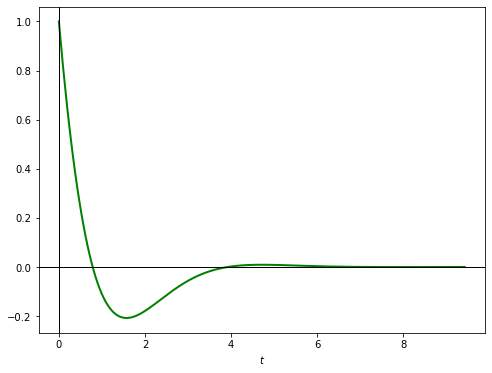

In [125]:
plt.figure(figsize=(8, 6))
tvalues = np.linspace(0, 3 * np.pi, 200)
yvalues = oscillation(tvalues, 1, -1)
plt.plot(tvalues, yvalues, lw=2, color='green')
plt.axvline(0, lw=1, color='black')
plt.axhline(0, lw=1, color='black')
plt.xlabel('$t$')
None

Just recall the following rule of thumb: Always use the `numpy` versions of mathematical functions, and your code will be automatically vectorized.

Another built-in vectorization feature in `numpy` are the *componentwise operators*. `numpy` defines a componentwise operator for each of the Python arithmetic operators. Let's consider the following example:

In [115]:
n = 100
# Define two arrays with random entries in the interval [0,1].
a = np.random.rand(n)
b = np.random.rand(n)
# Add the two arrays component by component
c = a + b
print(a[:5])
print(b[:5])
print(c[:5])

[0.41938857 0.82402552 0.00822333 0.55073581 0.73564263]
[0.68825665 0.33421616 0.18207178 0.7201283  0.59884643]
[1.10764522 1.15824169 0.19029511 1.27086411 1.33448906]


In [1]:
import numpy as np

What I want here:

Comparing times writing your own loop and using built in functions

Present built-in vectorized "accumulation" functions: sum, max, min, prod.

Pointwise array operations.

Vectorized functions

Vector/matrix algebra operations.

Propagation.

An extended example: the trapezoid rule.

In [13]:
n = 1000
a = np.random.rand(n)
a[:10]

array([0.17992871, 0.82238675, 0.62494076, 0.53441058, 0.97629497,
       0.55591498, 0.70984007, 0.80135714, 0.33531788, 0.95035262])

In [15]:
%%timeit
array_sum = 0.0
for j in range(n):
    array_sum += a[j]

110 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
print(array_sum)

495.91940488203215


In [17]:
%%timeit
array_sum = np.sum(a)

3.18 µs ± 39.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
print(array_sum)

495.91940488203215


In [30]:
n = 5
a = np.array([[i+n*j for i in range(n)] for j in range(n)])
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [31]:
np.sum(a)

300

In [32]:
np.sum(a,axis=0)

array([50, 55, 60, 65, 70])

In [33]:
np.sum(a,axis=1)

array([ 10,  35,  60,  85, 110])

In [34]:
n = 100
A = np.random.rand(n, n)
v = np.random.rand(n).reshape(n,1)

In [36]:
%%timeit
w = np.zeros(n)
for i in range(n):
    for j in range(n):
        w[i] += A[i,j] * v[j]

20.3 ms ± 593 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
print(w[:5])

[23.38096257 22.48521182 26.140368   26.7262479  26.66991435]


In [44]:
%%timeit
w = A.dot(v)

1.27 µs ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [40]:
print(w[:5])

[23.38096257 22.48521182 26.140368   26.7262479  26.66991435]


In [43]:
%%timeit
w = A @ (v)

1.77 µs ± 18.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [42]:
print(w[:5])

[23.38096257 22.48521182 26.140368   26.7262479  26.66991435]


$$
\int_{a}^{b}f(x)\,dx = \frac{1}{2}\sum_{j=0}^{n-1}(f(x_{j+1})+f(x_j))\Delta x_j
$$
Non-vectorized version:

In [82]:
deltax = 0.00001
a, b = 0.0, 1.0
xgrid = np.arange(a, b + deltax, deltax)
n = len(xgrid) - 1

In [98]:
%%timeit
acc = 0.0
for j in range(n):
    acc += np.exp(xgrid[j+1]) + np.exp(xgrid[j])
int_approx = 0.5 * acc * deltax

187 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
print(int_approx)

1.7182818284733647


In [100]:
%%timeit
exp_grid = np.exp(xgrid)
int_approx = 0.5 * np.sum(exp_grid[:-1] + exp_grid[1:]) * deltax

493 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [101]:
print(int_approx)

1.7182818284733647
